- El polimorfismo es uno de los pilares básicos en la programación orientada a objetos, por lo que para entenderlo es importante tener las bases de la POO y la herencia bien asentadas.
- El término polimorfismo tiene origen en las palabras poly (muchos) y morfo (formas), y aplicado a la programación hace referencia a que los objetos pueden tomar diferentes formas. ¿Pero qué significa esto?
- Es un nombre llamativo para un concepto sencillo: distintos comportamientos ocurren según la subclase que se esté usando, **sin necesidad de saber explícitamente cuál es**.
- Polimorfismo significa que distintos objetos (de distintas subclases) pueden responder al mismo mensaje o método de formas diferentes.

## Ejemplos

### Animales que hablan

En programación orientada a objetos (POO), el polimorfismo se refiere a la capacidad que tiene el código cliente de invocar un mismo método en distintos objetos, y que cada objeto responda de la forma que le corresponde según su propia implementación.

Por ejemplo, imaginemos que tenemos una colección de perros, gatos y pájaros, y que cada uno entiende algunos comandos básicos. Si les pedimos a estas mascotas que hablen (es decir, si les enviamos el mensaje "habla"), los perros van a ladrar, los gatos van a maullar y los pájaros van a piar.

In [1]:
class Animal:
    def __init__(self, nombre):
        self.nombre = nombre

class Perro(Animal):
    def hablar(self):
        print(self.nombre, "dice ¡guau!")


class Gato(Animal):
    def hablar(self):
        print(self.nombre, "dice ¡miau!")


class Pajaro(Animal):
    def hablar(self):
        print(self.nombre, "dice ¡pio pio!")

mascotas = [
    Perro("Julio"),
    Gato("Micha"),
    Perro("Justo"),
    Pajaro("Pedrito")
]

for mascota in mascotas:
    mascota.hablar()

Julio dice ¡guau!
Micha dice ¡miau!
Justo dice ¡guau!
Pedrito dice ¡pio pio!


* Cada clase tiene un método `hablar()`, pero el contenido de ese método es diferente.
* Cada clase hace lo que necesita hacer en su propia versión de ese método; el nombre del método es el mismo, pero su implementación es distinta.

Para que todo sea más fácil de manejar, ponemos todos los objetos de tipo mascota en una lista.

Para hacer que todas hablen, recorremos esa lista y enviamos el mismo mensaje llamando a un método con exactamente el mismo nombre en cada objeto, sin preocuparnos por el tipo de objeto que sea.


::: {.callout-note}

Los programadores orientados a objetos suelen usar la expresión “enviar un mensaje” cuando hablamos de que el código cliente llama a un método de un objeto.

Lo que el objeto haga al recibir ese mensaje depende exclusivamente de él.
Con el polimorfismo, podemos enviar el mismo mensaje a varios objetos, y cada uno va a reaccionar de manera diferente según cómo fue diseñado y según los datos que tenga disponibles.


::: 

### La forma es lo de menos

In [2]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

    def dibujo(self):
        # Línea superior
        print("┌" + " ─ " * (self.base) + "┐")

        # Líneas intermedias
        for _ in range(self.altura):
            print("│" + "   " * (self.base) + "│")

        # Línea inferior
        print("└" + " ─ " * (self.base) + "┘")

class Cuadrado(Rectangulo):
    def __init__(self, lado):
        self.base = lado
        self.altura = lado

    def resumen(self):
        return f"Cuadrado(lado={self.base})"

In [3]:
formas = [
    Cuadrado(5),
    Rectangulo(3, 2),
    Cuadrado(3),
    Rectangulo(4, 3),
    Rectangulo(6, 4),
]

formas_ordenadas = sorted(formas, key=lambda f: f.area())
for forma in formas_ordenadas:
    print(forma.resumen(), forma.area(), sep=": ")

Rectangulo(base=3, altura=2): 6
Cuadrado(lado=3): 9
Rectangulo(base=4, altura=3): 12
Rectangulo(base=6, altura=4): 24
Cuadrado(lado=5): 25


In [4]:
for forma in formas_ordenadas:
    forma.dibujo()

┌ ─  ─  ─ ┐
│         │
│         │
└ ─  ─  ─ ┘
┌ ─  ─  ─ ┐
│         │
│         │
│         │
└ ─  ─  ─ ┘
┌ ─  ─  ─  ─ ┐
│            │
│            │
│            │
└ ─  ─  ─  ─ ┘
┌ ─  ─  ─  ─  ─  ─ ┐
│                  │
│                  │
│                  │
│                  │
└ ─  ─  ─  ─  ─  ─ ┘
┌ ─  ─  ─  ─  ─ ┐
│               │
│               │
│               │
│               │
│               │
└ ─  ─  ─  ─  ─ ┘


A la función lambda no le importa que tipo específico de objeto le fue pasado. Siempre y cuando el objeto sea de una clase que implementa el método `.area()`, se obtiene una lista de objetos ordenados según su área.

## Métodos mágicos

### Operadores polimórficos

In [5]:
12 + 18

30

In [6]:
"A" + "B"

'AB'

In [7]:
[1, 2] + [3, 4]

[1, 2, 3, 4]

In [8]:
r1 = Rectangulo(3, 2)
r2 = Rectangulo(3, 2)

In [9]:
r1.dibujo()
r2.dibujo()

┌ ─  ─  ─ ┐
│         │
│         │
└ ─  ─  ─ ┘
┌ ─  ─  ─ ┐
│         │
│         │
└ ─  ─  ─ ┘


In [10]:
r1 == r2

False

¿?

In [11]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

    def dibujo(self):
        print("┌" + " ─ " * (self.base) + "┐")
        for _ in range(self.altura):
            print("│" + "   " * (self.base) + "│")
        print("└" + " ─ " * (self.base) + "┘")

    def __eq__(self, other):
        if self.base == other.base and self.altura == other.altura:
            return True
        return False

In [12]:
r1 = Rectangulo(3, 2)
r2 = Rectangulo(3, 2)
r3 = Rectangulo(5, 3)

In [13]:
r1 == r2

True

In [14]:
r1 == r3

False

In [15]:
r1 != r3

True

In [16]:
r1 != r2

False

In [17]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def resumen(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

    def dibujo(self):
        print("┌" + " ─ " * (self.base) + "┐")
        for _ in range(self.altura):
            print("│" + "   " * (self.base) + "│")
        print("└" + " ─ " * (self.base) + "┘")

    def __eq__(self, other):
        return self.base == other.base and self.altura == other.altura

    def __lt__(self, other):
        return self.area() < other.area()

    def __le__(self, other):
        return self.area() <= other.area()

    def __gt__(self, other):
        return self.area > other.area()

    def __ge__(self, other):
        return self.area >= other.area()

In [18]:
r1 = Rectangulo(3, 5)
r2 = Rectangulo(3, 4)
r3 = Rectangulo(5, 3)

In [19]:
r1 < r2

False

In [20]:
r1 < r3

False

In [21]:
r1 <= r3

True

In [22]:
r1 == r2

False

### Modificando la apariencia

In [23]:
class Rectangulo:
    def __init__(self, base, altura):
        self.base = base
        self.altura = altura

    def area(self):
        return self.base * self.altura

    def perimetro(self):
        return self.base * 2 + self.altura * 2

    def __repr__(self):
        return f"Rectangulo(base={self.base}, altura={self.altura})"

r1 = Rectangulo(5, 3.5)

In [24]:
r1

Rectangulo(base=5, altura=3.5)

In [25]:
repr(r1)

'Rectangulo(base=5, altura=3.5)'

In [26]:
str(r1)

'Rectangulo(base=5, altura=3.5)'

## Magia aritmética

In [27]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

v = Vector(2, 2)
u = Vector(1, -0.5)
v, u

(Vector(2, 2), Vector(1, -0.5))

In [28]:
v + u

Vector(3, 1.5)

In [29]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

v = Vector(2, 2)
u = Vector(1, -0.5)

print(v - u)
print(u - v)

Vector(1, 2.5)
Vector(-1, -2.5)


In [30]:
import matplotlib.pyplot as plt

class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Vector(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Vector(self.x - other.x, self.y - other.y)

    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

    def __truediv__(self, scalar):
        return Vector(self.x / scalar, self.y / scalar)

    def __repr__(self):
        return f"Vector({self.x}, {self.y})"

In [31]:
v1 = Vector(5, 3)
v1

Vector(5, 3)

In [32]:
v1 * 2

Vector(10, 6)

In [36]:
def graficar_vectores(vectores):
    x_range = [0, 0]
    y_range = [0, 0]

    for i, vector in enumerate(vectores):
        plt.quiver(
            0, 0, vector.x, vector.y, 
            angles='xy',
            scale_units='xy',
            scale=1,
            color=f"C{i}",
            label=str(vector)
        )

        x_range[0] = min(x_range[0], vector.x)
        x_range[1] = max(x_range[1], vector.x)

        y_range[0] = min(y_range[0], vector.y)
        y_range[1] = max(y_range[1], vector.y)

    x_range[0] = x_range[0] - 0.5
    x_range[1] = x_range[1] + 0.5
    y_range[0] = y_range[0] - 0.5
    y_range[1] = y_range[1] + 0.5

    plt.axhline(0, color='k', linewidth=0.5)
    plt.axvline(0, color='k', linewidth=0.5)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.legend(loc="upper left")
    plt.show()

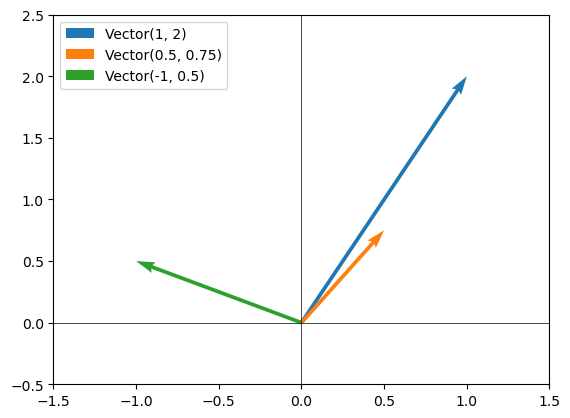

In [37]:
graficar_vectores(
    [
        Vector(1, 2),
        Vector(0.5, 0.75),
        Vector(-1, 0.5),
    ]
)

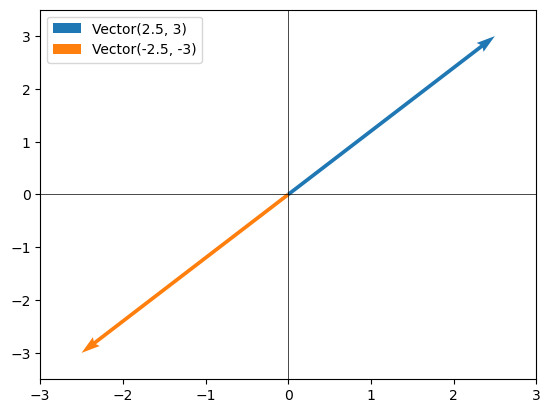

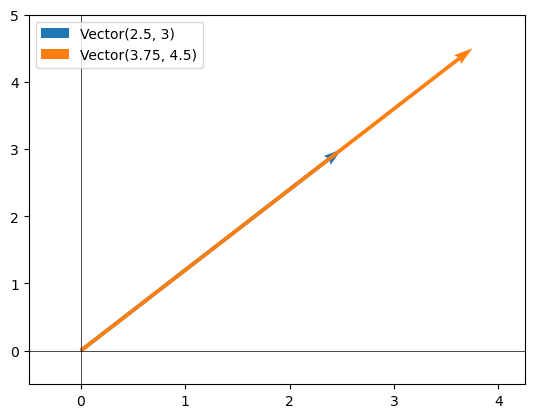

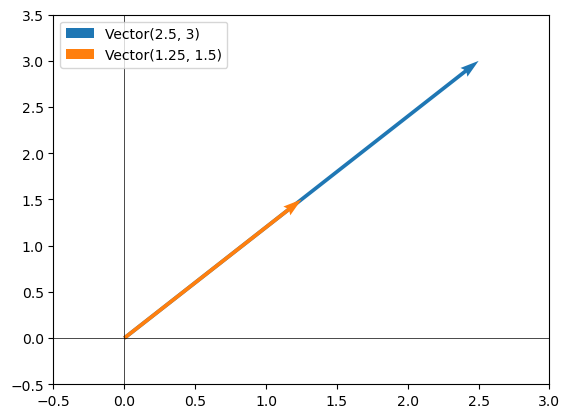

In [38]:
v = Vector(2.5, 3)

graficar_vectores([v, v * (-1)])
graficar_vectores([v, v * 1.5])
graficar_vectores([v, v * 0.5])

La sobrecarga de operadores no hace posibles nuevas operaciones, sólo hace que la API sea más expresiva y más cercana a la notación matemática.

## Errores

* Elevacion de errores
* Implementacion de errores